In [1]:
import sys
sys.path.append("..")
from IPython.display import display

In [2]:
import numpy as np
import logging
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import importlib 
plt.rcParams["figure.figsize"] = (8,8)

In [3]:
from scripts import reclusterTree
from scripts import linkageList
from scripts import heatClustermap
from scripts import Tree1D

In [4]:
# Reload filles after changes
importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)
importlib.reload(Tree1D)

<module 'scripts.Tree1D' from '/Users/sebastian/Dropbox/Documents/Physics_projects/simulator/VisualizeBinaryTrees/scripts/Tree1D.py'>

In [5]:
# Data dir
input_dir= 'data/'
# input_dir ="../ToyJetsShower/data/"

In [6]:
# input_jet = 'tree_13_truth'
input_jet = 'tree_10_truth'

In [7]:
with open(input_dir+ str(input_jet) + '.pkl', "rb") as fd: 
    truth_jet = pickle.load(fd, encoding='latin-1')[0]

jet_name = ('_').join(input_jet.split('_')[-3:-1])
truth_jet["name"]=jet_name
truth_jet["algorithm"]="truth"

display(truth_jet["name"])

'tree_10'

In [8]:
# Number of jet constituents
linkageList.runTraverse_jet(truth_jet)
len(truth_jet["outers_list"])

57

In [9]:
# Recluster jet
recluster = True
if recluster:
    reclusterKt = reclusterTree.recluster(truth_jet, alpha=1)
    reclusterAntikt = reclusterTree.recluster(truth_jet, alpha=-1)
    reclusterCA = reclusterTree.recluster(truth_jet, alpha=0)

2019-08-05 20:01:47,031:INFO::Output jet filename = data/tree_10_1.pkl
2019-08-05 20:02:09,692:INFO::Output jet filename = data/tree_10_-1.pkl
2019-08-05 20:02:30,209:INFO::Output jet filename = data/tree_10_0.pkl


In [10]:
# Load reclustered jets
with open(input_dir+ str(truth_jet["name"])+'_1' + '.pkl', "rb") as fd: reclusterKt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_-1' + '.pkl', "rb") as fd: reclusterAntikt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_0' + '.pkl', "rb") as fd: reclusterCA = pickle.load(fd, encoding='latin-1')

# 1D -TREE ONLY VISUALIZATIONS

### Ordering of the leaves as they are accessed when traversing the tree

TRUTH JET


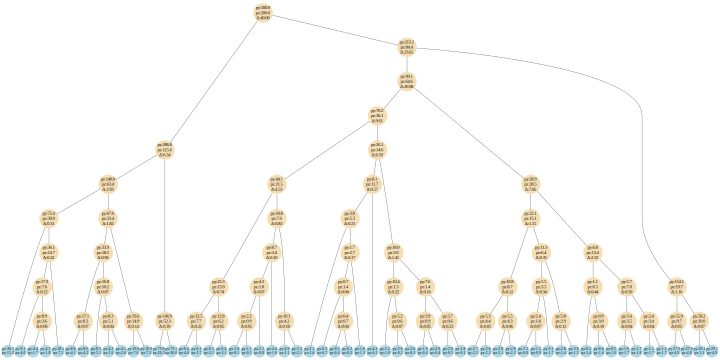

In [11]:
print('TRUTH JET')
tree = Tree1D.plotBinaryTree(truth_jet, label=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

KT JET


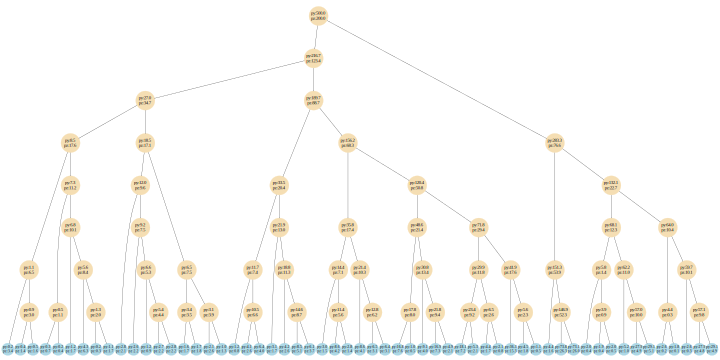

In [12]:
print('KT JET')
tree = Tree1D.plotBinaryTree(reclusterKt, label=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

CA JET


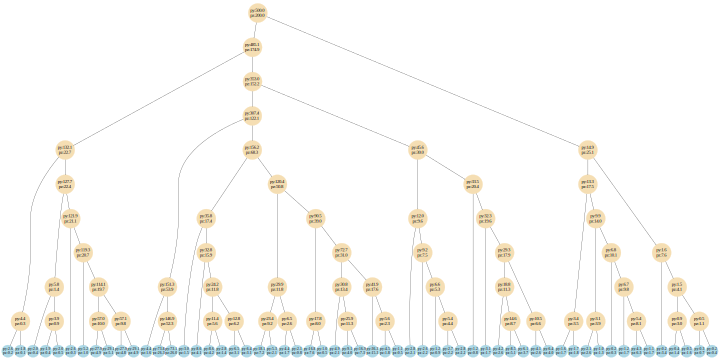

In [13]:
print('CA JET')
tree = Tree1D.plotBinaryTree(reclusterCA, label=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

ANTIKT JET


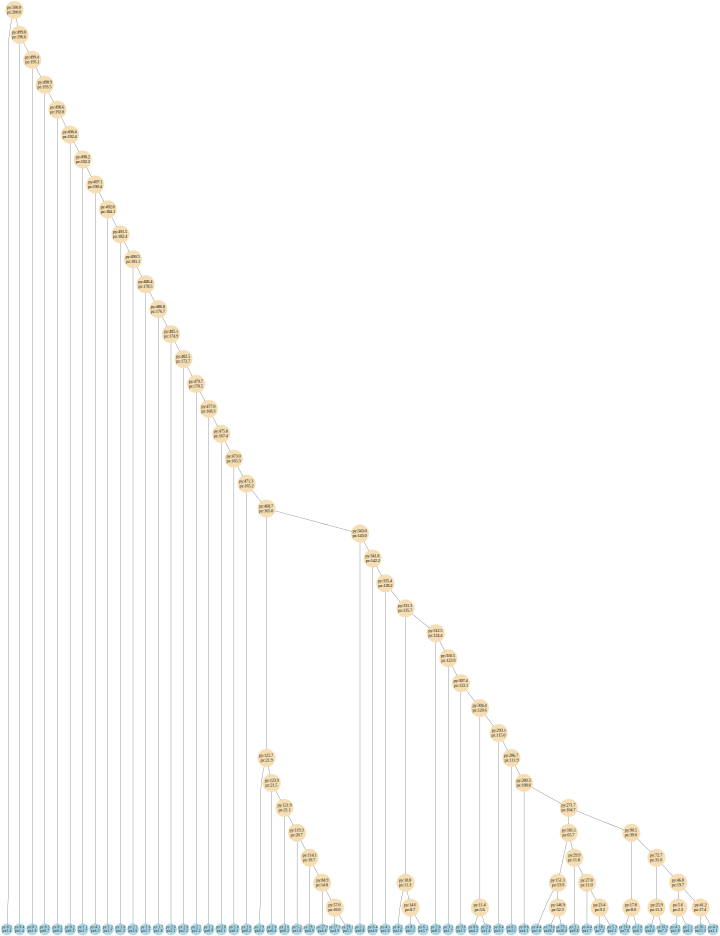

In [14]:
print('ANTIKT JET')
tree = Tree1D.plotBinaryTree(reclusterAntikt, label=True)
tree.attr(rankdir='TB', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

### Sort leaves by increasing  py (pT=abs[py])

TRUTH JET


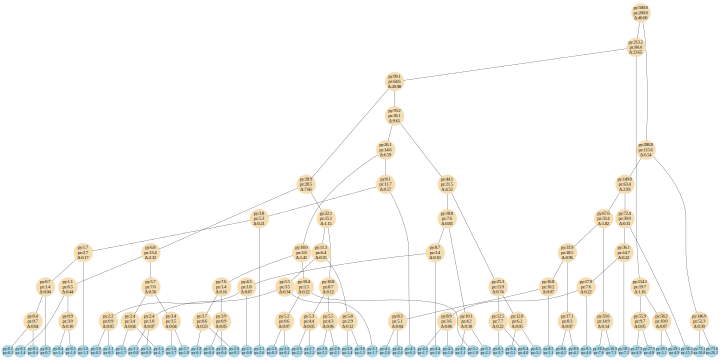

In [15]:
print('TRUTH JET')
tree = Tree1D.plotBinaryTree(truth_jet, label=True, pySort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

KT JET


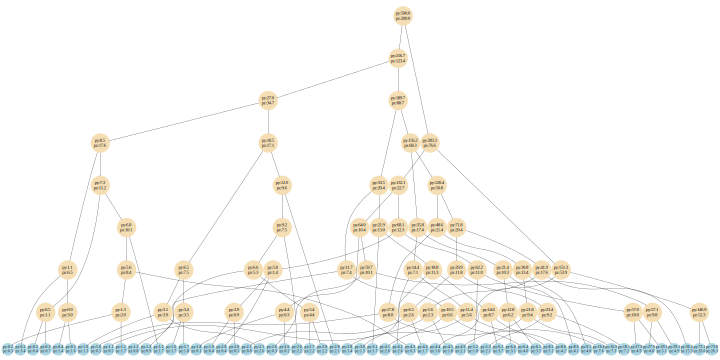

In [16]:
print('KT JET')
tree = Tree1D.plotBinaryTree(reclusterKt, label=True, pySort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

CA JET


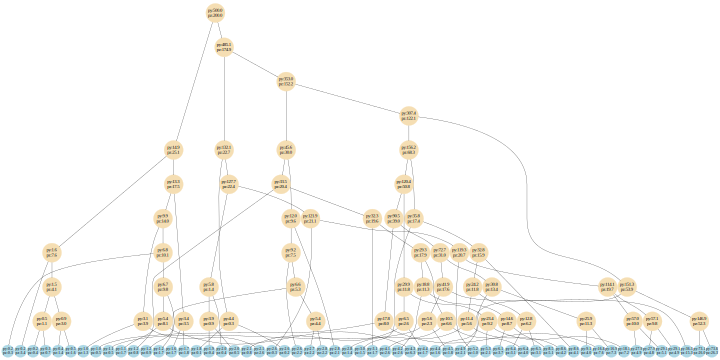

In [17]:
print('CA JET')
tree = Tree1D.plotBinaryTree(reclusterCA, label=True, pySort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

ANTIKT JET


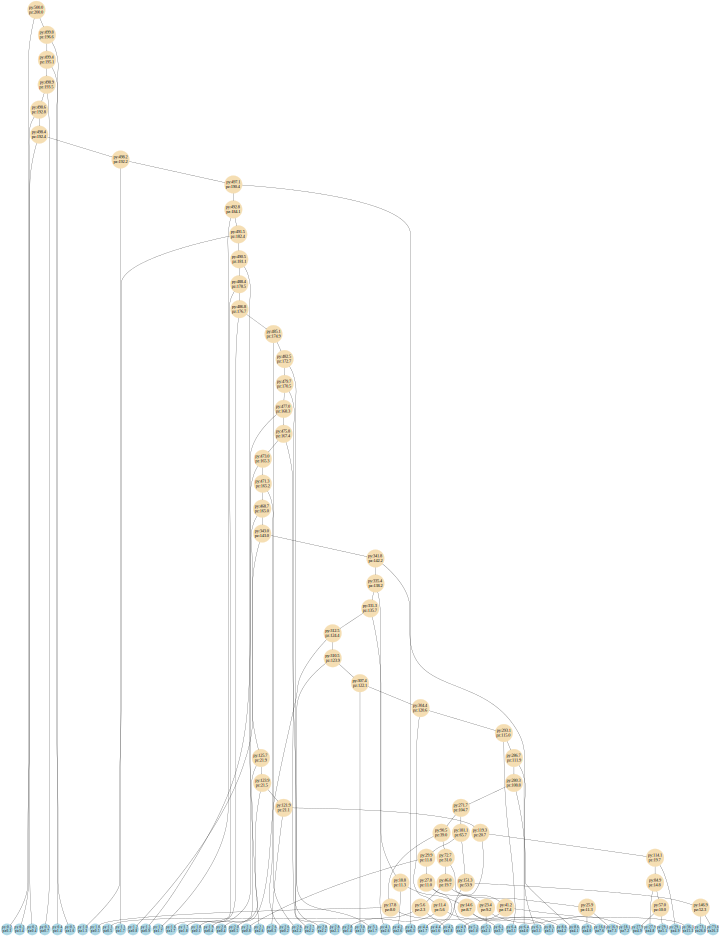

In [18]:
print('ANTIKT JET')
tree = Tree1D.plotBinaryTree(reclusterAntikt, label=True, pySort=True)
tree.attr(rankdir='TB', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

## PAIR OF TREES COMPARISONS

### Leaves ordered as they are accessed when traversing the TRUTH JET tree

Leaves ordered according to truth jet - KT (top) vs TRUTH (bottom) trees


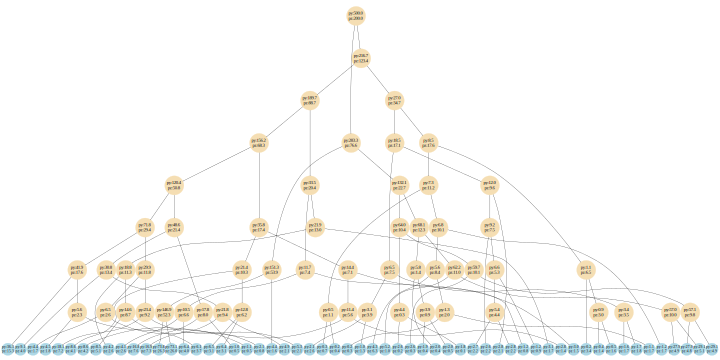

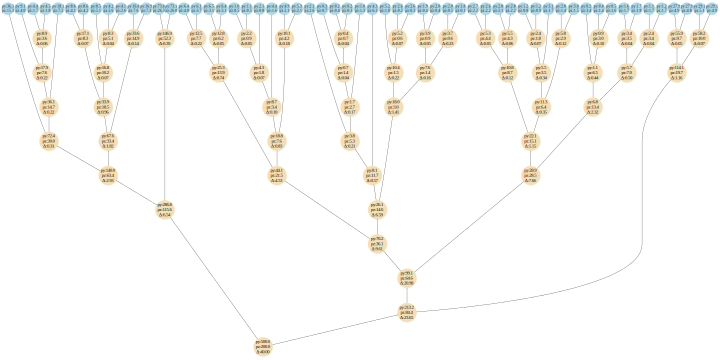

In [19]:
print("Leaves ordered according to truth jet - KT (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterKt, truth_jet, truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to truth jet - CA (top) vs TRUTH (bottom) trees


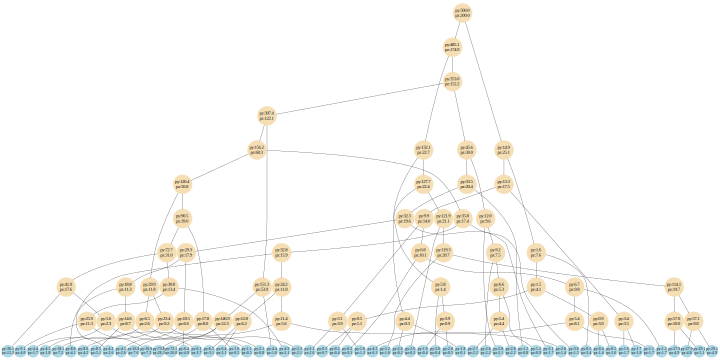

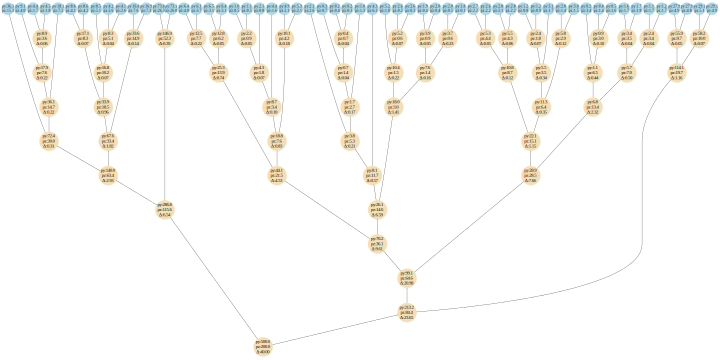

In [20]:
print("Leaves ordered according to truth jet - CA (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterCA, truth_jet,  truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to truth jet - ANTIKT (top) vs TRUTH (bottom) trees


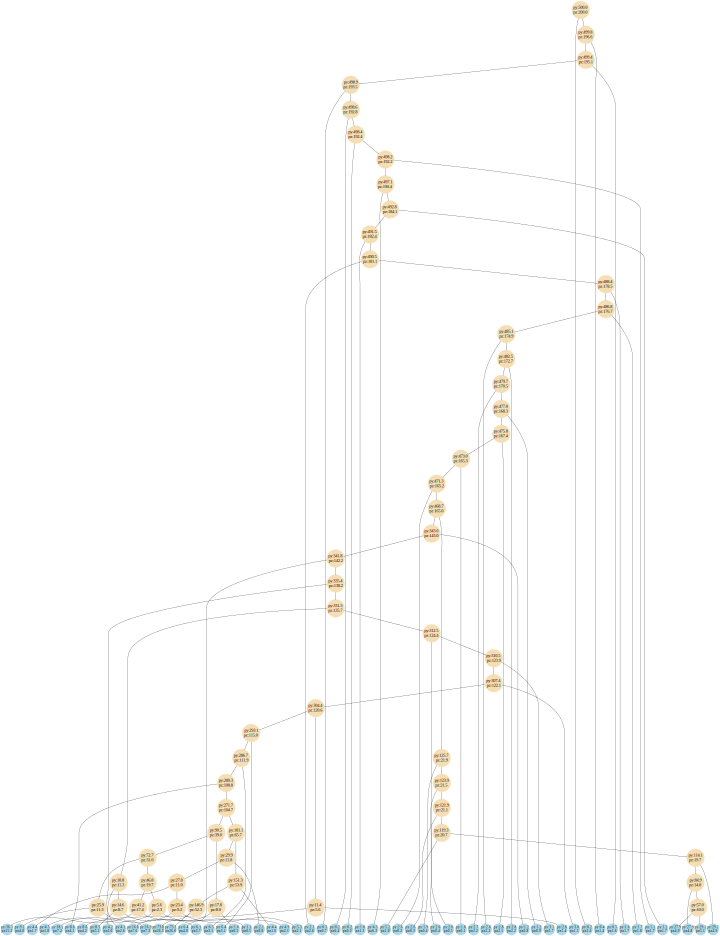

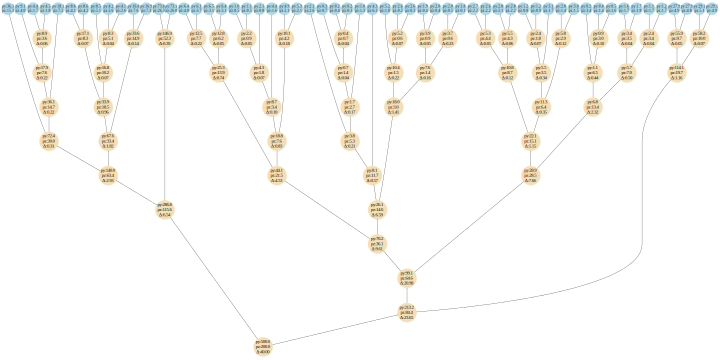

In [21]:
print("Leaves ordered according to truth jet - ANTIKT (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterAntikt, truth_jet, truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

### Leaves ordered as accessed when traversing the JET in the 1st argument of visualizeTreePair 

Leaves ordered according to ANTIKT jet - TRUTH (top) vs ANTIKT (bottom) trees


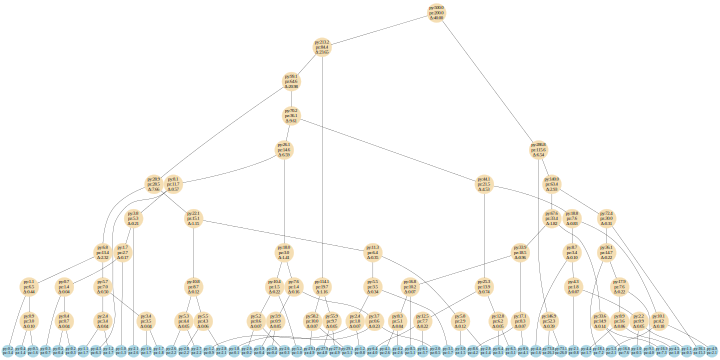

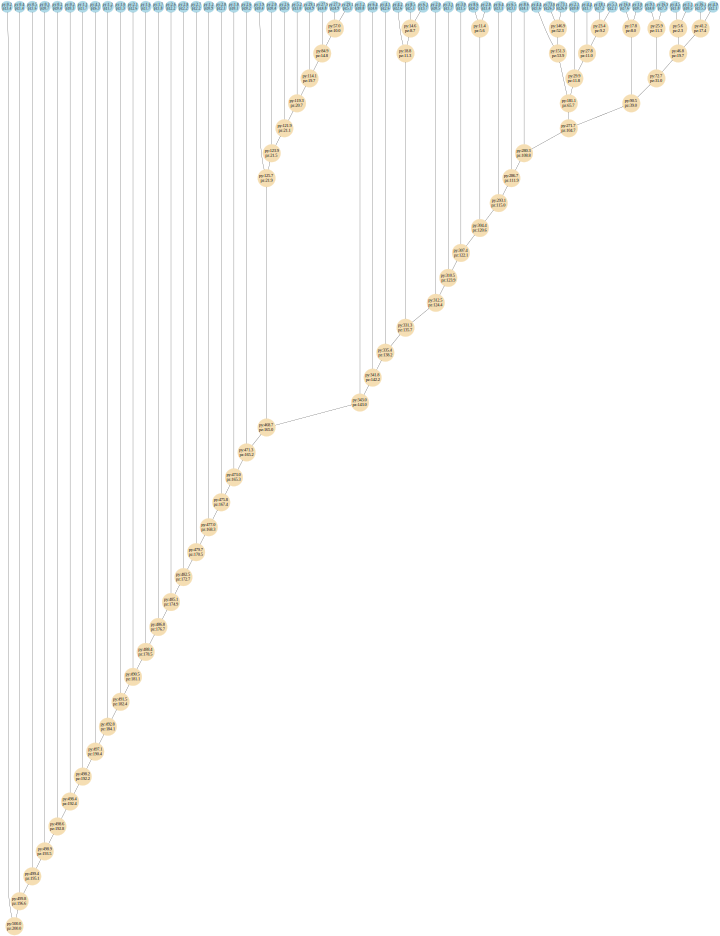

In [22]:
print("Leaves ordered according to ANTIKT jet - TRUTH (top) vs ANTIKT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterAntikt, truth_jet,  truthOrder=False, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to ANTIKT jet - KT (top) vs ANTIKT (bottom) trees


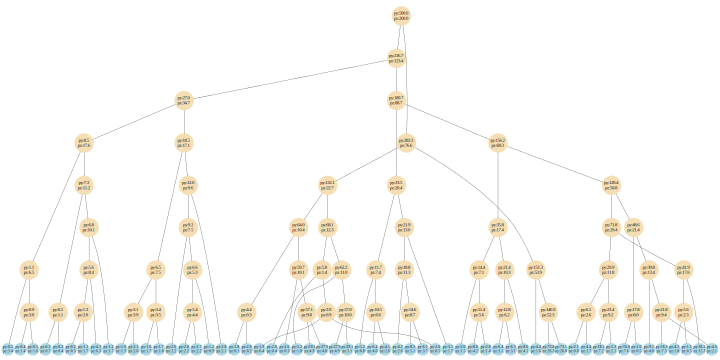

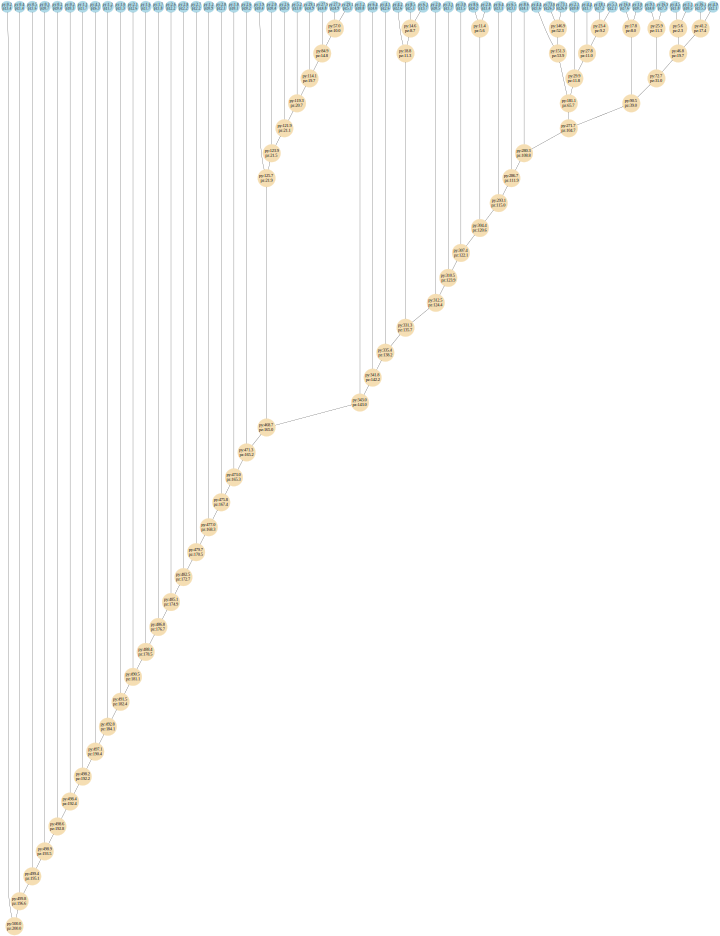

In [23]:
print("Leaves ordered according to ANTIKT jet - KT (top) vs ANTIKT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterAntikt, reclusterKt,  truthOrder=False, label=True, alpha_jet1=-1, alpha_jet2= 1)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to KT jet - CA (top) vs KT (bottom) trees


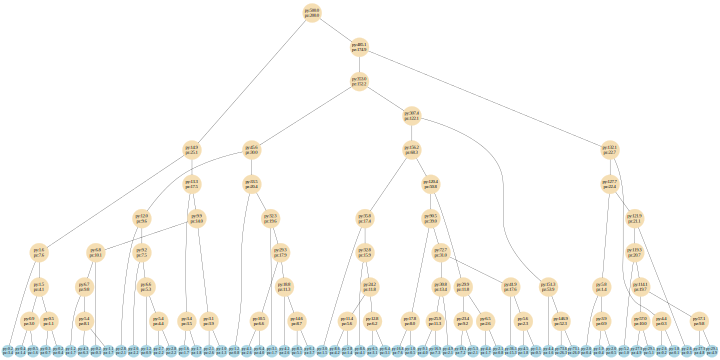

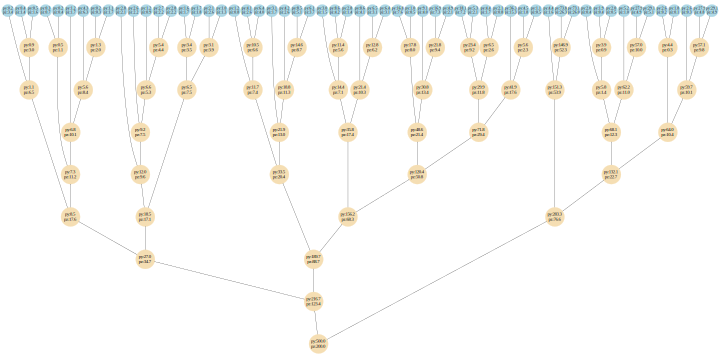

In [24]:
print("Leaves ordered according to KT jet - CA (top) vs KT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterKt, reclusterCA, truthOrder=False, label=True, alpha_jet1=1, alpha_jet2= 0)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)